In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

In [2]:
#importing dataset and converting to datasframe
data = pd.read_csv('heart.csv', header=None)
# data = np.genfromtxt(open("heart.csv","rb"),delimiter=",")

In [3]:
df = pd.DataFrame(data) #data frame

In [4]:
#extracting columns x and y
x = df.iloc[:, 0:5]
x = x.drop(x.columns[1:3], axis=1)
x = pd.DataFrame(scale(x))

In [5]:
y = df.iloc[:, 13]
y = y-1

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

Text(0.5, 1.0, 'Original Data')

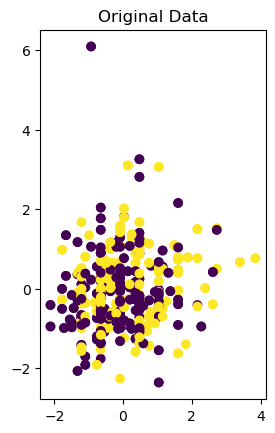

In [7]:
#plotting the data
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[1],x[2], c=y)
ax1.set_title("Original Data")

In [8]:
model = KNeighborsClassifier(n_neighbors=5)

In [9]:
#10-fold cross validation
scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
# print scores
print ("10-Fold Accuracy : ", scores.mean()*100)

10-Fold Accuracy :  68.78759398496241


In [10]:
#creation of the confusion matrix
model.fit(x_train,y_train)
print ("Testing Accuracy : ",model.score(x_test, y_test)*100)
predicted = model.predict(x)

Testing Accuracy :  64.75770925110133


In [11]:
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[1],x[2], c=predicted)
ax2.set_title("KNearestNeighbours")

Text(0.5, 1.0, 'KNearestNeighbours')

In [12]:
cm = metrics.confusion_matrix(y, predicted)
print (cm/len(y))
print (metrics.classification_report(y, predicted))


plt.show()

[[0.39506173 0.15167549]
 [0.13580247 0.31746032]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       310
           1       0.68      0.70      0.69       257

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567

